# Credit Card Fraud Modeling- Capital One Data Science Challenge

## B. Data Preprocessing and Feature Selection

------

### Imports

In [1]:
import pandas as pd
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.preprocessing import PowerTransformer

### Possible Features to Train the Model (Research)

- transactionAmount – Fraudulent transactions may involve unusual amounts.
<br>
- availableMoney – Helps detect if fraudulent transactions deplete available funds.
<br>
- creditLimit – Could indicate high-risk accounts.
<br>
- merchantName & merchantCategoryCode – Certain merchants or categories might be more prone to fraud.
<br>
- acqCountry & merchantCountryCode – Transactions in unusual locations may indicate fraud.
<br>
- posEntryMode & posConditionCode – Helps identify suspicious card-not-present transactions.
<br>
- transactionType – Some transaction types are more susceptible to fraud.
<br>
- currentBalance – Unusual changes in balance might indicate fraud.
<br>
- cardPresent – Helps detect potential card-not-present fraud.
<br>
- expirationDateKeyInMatch – Mismatched expiration dates can be a sign of fraud.
<br>
- enteredCVV – CVV mismatches or missing CVVs can indicate fraudulent attempts.

To determine which features to use, we're going to check the correlation between features.

In [2]:
transactions = pd.read_csv('/Users/DS/Capital_One_Data_Science_Challenge/output.csv')

In [3]:
display(transactions)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90.0,...,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,...,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,...,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,9.0,...,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


In [4]:
# Drop duplicates from the dataset
transactions = transactions.drop_duplicates(keep='last')
transactions

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90.0,...,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,...,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,...,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,9.0,...,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


In [5]:
# Identify the columns where all the data is null
full_null_columns = transactions.columns[transactions.isnull().all() == True]
print(full_null_columns)

# Drop columns that only contain null values
transactions = transactions.drop(columns=full_null_columns)
transactions.columns


Index(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip',
       'posOnPremises', 'recurringAuthInd'],
      dtype='object')


Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [6]:
# Keep the features listed above
cleaned_transactions = transactions[['accountNumber', 'transactionAmount', 'transactionDateTime', 'availableMoney', 'creditLimit', 'merchantName','merchantCategoryCode', 'acqCountry', 
                                     'posEntryMode', 'posConditionCode', 'transactionType', 'currentBalance', 'cardPresent', 'expirationDateKeyInMatch', 'enteredCVV', 'isFraud']]
cleaned_transactions

,accountNumber,transactionAmount,transactionDateTime,availableMoney,creditLimit,merchantName,merchantCategoryCode,acqCountry,posEntryMode,posConditionCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,enteredCVV,isFraud
0,737265056,98.55,2016-08-13T14:27:32,5000.00,5000,Uber,rideshare,US,2.0,1.0,PURCHASE,0.00,False,False,414,False
1,737265056,74.51,2016-10-11T05:05:54,5000.00,5000,AMC #191138,entertainment,US,9.0,1.0,PURCHASE,0.00,True,False,486,False
2,737265056,7.47,2016-11-08T09:18:39,5000.00,5000,Play Store,mobileapps,US,9.0,1.0,PURCHASE,0.00,False,False,486,False
3,737265056,7.47,2016-12-10T02:14:50,5000.00,5000,Play Store,mobileapps,US,9.0,1.0,PURCHASE,0.00,False,False,486,False
4,830329091,71.18,2016-03-24T21:04:46,5000.00,5000,Tim Hortons #947751,fastfood,US,2.0,1.0,PURCHASE,0.00,True,False,885,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,119.92,2016-12-22T18:44:12,48904.96,50000,Lyft,rideshare,US,90.0,1.0,PURCHASE,1095.04,False,False,936,False
786359,732852505,18.89,2016-12-25T16:20:34,48785.04,50000,hulu.com,online_subscriptions,US,9.0,1.0,PURCHASE,1214.96,False,False,939,False
786360,732852505,49.43,2016-12-27T15:46:24,48766.15,50000,Lyft,rideshare,US,2.0,1.0,PURCHASE,1233.85,False,False,936,False
786361,732852505,49.89,2016-12-29T00:30:55,48716.72,50000,walmart.com,online_retail,US,9.0,99.0,PURCHASE,1283.28,False,False,939,False


In [7]:
# Features (X) and Target (y)
X = cleaned_transactions.drop(columns=['isFraud'])  
y = cleaned_transactions['isFraud'].astype(int)

### 1.  Feature Engineering

In [8]:
# Convert boolean columns to integers (0/1)
bool_cols = ['cardPresent', 'expirationDateKeyInMatch']
X[bool_cols] = X[bool_cols].astype(int)

In [9]:
# Handle categorical columns using Label Encoding (if fewer categories) or One-Hot Encoding
cat_cols = ['merchantName', 'merchantCategoryCode', 'acqCountry', 'posEntryMode', 'posConditionCode', 'transactionType', 'enteredCVV']
X[cat_cols] = X[cat_cols].astype(str)  # Ensure categorical columns are strings

In [10]:
# Use Label Encoding for simplicity
for col in cat_cols:
    encoder = LabelEncoder()
    X[col] = encoder.fit_transform(X[col])

In [11]:
# Standardize numerical columns
num_cols = ['transactionAmount', 'availableMoney', 'creditLimit', 'currentBalance']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [12]:
# Convert to datetime format 
X['transactionDateTime'] = pd.to_datetime(X['transactionDateTime'])

# Extract time-based features
X['hour'] = X['transactionDateTime'].dt.hour
X['day_of_week'] = X['transactionDateTime'].dt.dayofweek  # Monday=0, Sunday=6
X['is_weekend'] = (X['day_of_week'] >= 5).astype(int)  # 1 if Sat/Sun, else 0
X['is_night'] = ((X['hour'] >= 22) | (X['hour'] <= 6)).astype(int)  # 1 if nighttime

# Sort transactions by accountNumber and transactionDateTime
X = X.sort_values(by=['accountNumber', 'transactionDateTime'])

# Compute time difference since last transaction per accountNumber
X['time_since_last'] = X.groupby('accountNumber')['transactionDateTime'].diff().dt.total_seconds()

# Fill NaNs with the median of 'time_since_last' (handling first transactions)
X['time_since_last'].fillna(X['time_since_last'].median(), inplace=True)

# Apply Log Transformation to compress extreme values
X['time_since_last_log'] = np.log1p(X['time_since_last'])

# Cap Long Gaps at the 99th Percentile
percentile_99 = np.percentile(X['time_since_last_log'], 99)
X['time_since_last_capped'] = np.where(X['time_since_last_log'] > percentile_99, percentile_99, X['time_since_last_log'])

# Create a Binary "Rapid Transaction" Flag (Bottom 5% of values)
threshold_rapid = np.percentile(X['time_since_last'], 5)  # Define rapid transaction cutoff
X['rapid_txn_flag'] = (X['time_since_last'] < threshold_rapid).astype(int)

# Apply Sine & Cosine transformations to cyclical time features
X['hour_sin'] = np.sin(2 * np.pi * X['hour'] / 24)
X['hour_cos'] = np.cos(2 * np.pi * X['hour'] / 24)

X['day_of_week_sin'] = np.sin(2 * np.pi * X['day_of_week'] / 7)
X['day_of_week_cos'] = np.cos(2 * np.pi * X['day_of_week'] / 7)

# Drop original time columns after transformation
X.drop(columns=['hour', 'day_of_week', 'transactionDateTime', 'time_since_last', 'time_since_last_log'], inplace=True)

/var/folders/4g/grss87b92zg4hmdb08ct09b00000gn/T/ipykernel_97583/1944234705.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['time_since_last'].fillna(X['time_since_last'].median(), inplace=True)


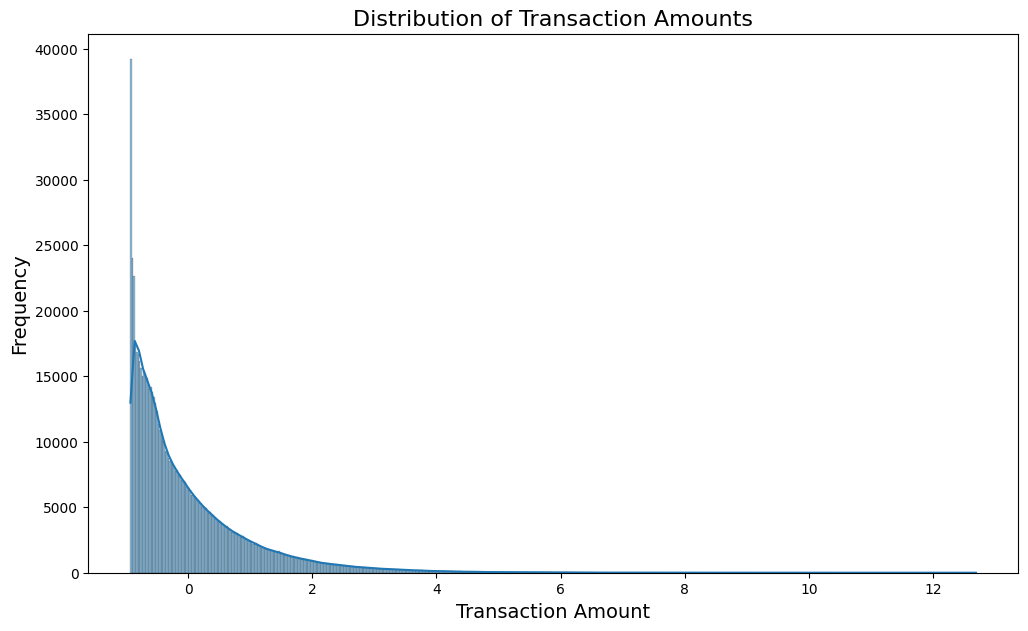

In [13]:
# Plot the distribution of transactions
plt.figure(figsize=(12, 7))
sns.histplot(X['transactionAmount'], kde=True)

plt.title('Distribution of Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [14]:
# Log transform 'transactionAmount' to reduce skewness
X['transactionAmount'] = np.log1p(X['transactionAmount'])

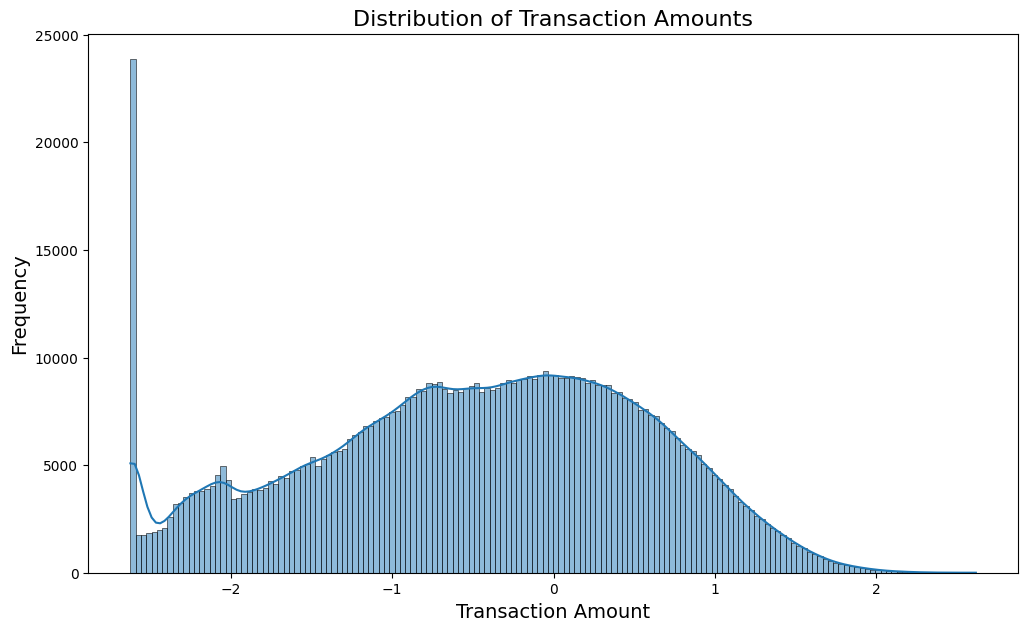

In [15]:
# Plot the distribution of transactions
plt.figure(figsize=(12, 7))
sns.histplot(X['transactionAmount'], kde=True)

plt.title('Distribution of Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

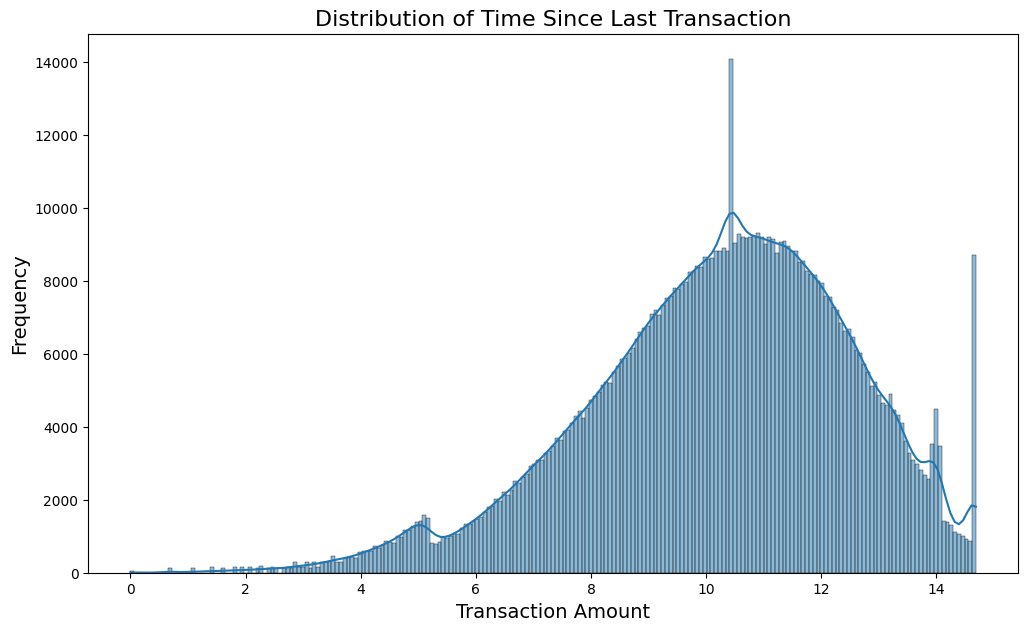

In [16]:
# Plot the distribution of time since last transaction
plt.figure(figsize=(12, 7))
sns.histplot(X['time_since_last_capped'], kde=True)

plt.title('Distribution of Time Since Last Transaction', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [17]:
# Features sanity check 
display(X)

,accountNumber,transactionAmount,availableMoney,creditLimit,merchantName,merchantCategoryCode,acqCountry,posEntryMode,posConditionCode,transactionType,...,expirationDateKeyInMatch,enteredCVV,is_weekend,is_night,time_since_last_capped,rapid_txn_flag,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos
541900,100088067,0.379319,4.926288,3.372290,534,3,3,0,0,1,...,0,489,0,1,10.423412,0,0.000000,1.000000,0.781831,0.623490
541901,100088067,-0.949332,4.903190,3.372290,363,5,3,1,0,1,...,0,489,0,0,11.124170,0,-0.965926,0.258819,0.781831,0.623490
541902,100088067,0.969276,4.897962,3.372290,1130,13,3,1,0,1,...,0,332,1,0,12.941144,0,-0.707107,-0.707107,-0.781831,0.623490
541903,100088067,-0.654025,4.926288,3.372290,528,3,3,0,0,1,...,0,489,0,0,14.150362,0,-0.965926,0.258819,0.781831,0.623490
541904,100088067,0.030757,4.918849,3.372290,14,5,3,3,1,1,...,0,489,0,1,10.370267,0,0.866025,0.500000,0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108111,999389635,0.633558,-0.149695,-0.494962,589,5,3,3,0,1,...,0,45,0,0,14.592060,0,-0.707107,-0.707107,-0.433884,-0.900969
108112,999389635,-2.263609,-0.179829,-0.494962,1305,12,3,1,0,1,...,0,45,0,0,13.147226,0,-0.258819,-0.965926,0.433884,-0.900969
108113,999389635,-2.263609,-0.177535,-0.494962,1305,12,3,1,0,1,...,0,45,1,0,14.685197,0,-0.866025,-0.500000,-0.781831,0.623490
108114,999389635,-2.263609,-0.175240,-0.494962,1305,12,3,1,0,1,...,0,45,0,1,14.685197,0,0.000000,1.000000,0.433884,-0.900969


### 2. Correlation Matrix of Features

After **standardizing and normalizing** the features, we will analyze the **correlation between features** to identify and mitigate **multicollinearity** within the dataset.

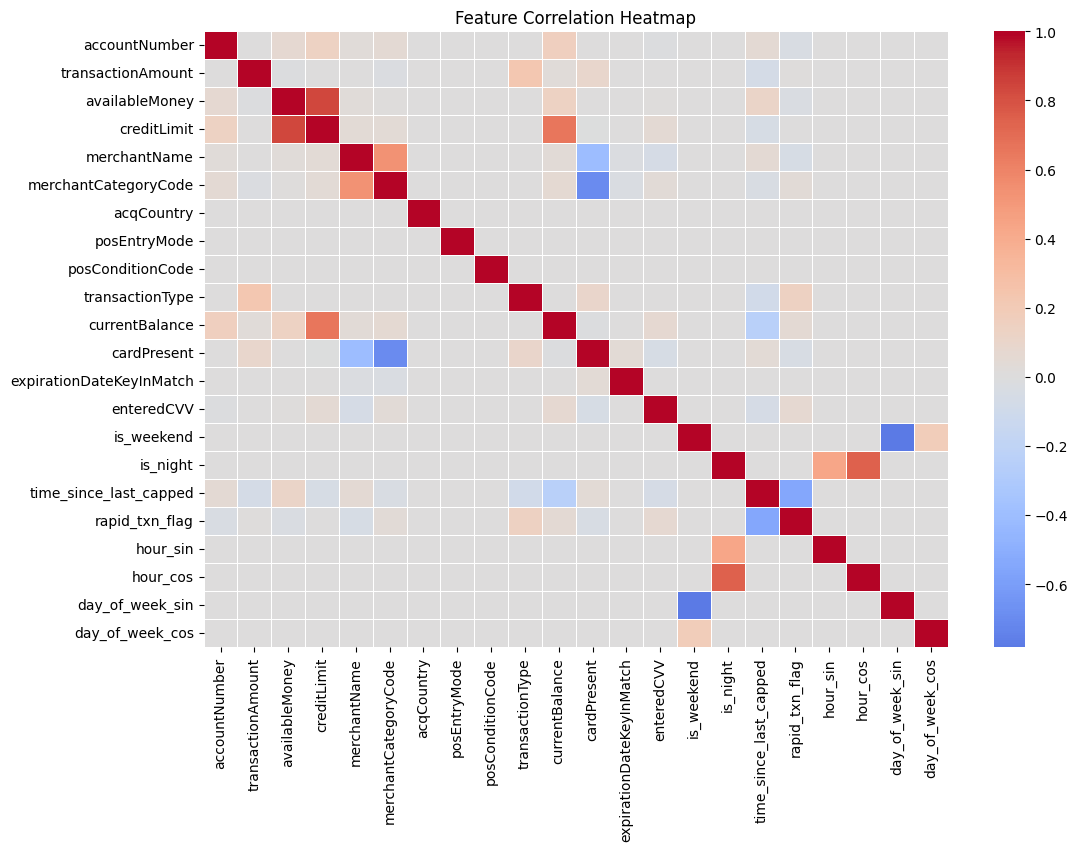

In [18]:
corr_matrix = X.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### 3. Findings from the Variance Inflation Factor

In [19]:
# Create VIF Data Frame
vif_data = pd.DataFrame()

# Calculate VIF for each feature
vif_data['Feature'] = X.columns 
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                     Feature        VIF
10            currentBalance        inf
2             availableMoney        inf
3                creditLimit        inf
6                 acqCountry  52.234390
0              accountNumber   5.601877
15                  is_night   3.843941
19                  hour_cos   3.141956
14                is_weekend   2.822092
20           day_of_week_sin   2.734508
5       merchantCategoryCode   2.239083
11               cardPresent   1.976087
18                  hour_sin   1.712165
17            rapid_txn_flag   1.440091
4               merchantName   1.419282
16    time_since_last_capped   1.399173
21           day_of_week_cos   1.095503
1          transactionAmount   1.062394
9            transactionType   1.018814
13                enteredCVV   1.005996
12  expirationDateKeyInMatch   1.001688
8           posConditionCode   0.999100
7               posEntryMode   0.994782


**Findings:**
<br>
1. AvailableMoney, creditLimit, currentBalance have infinite VIF (inf). This suggests perfect multicollinearity. 
2. High VIF (>10) for acqCountry 

We will drop these features to mitigate multicollinearity.

In [20]:
# Drop 'accountNumber' and 'customerID' due to perfect collinearity
X = X.drop(columns=['availableMoney', 'creditLimit', 'currentBalance', 'acqCountry'], inplace=False)

In [21]:
# Sanity Check 
display(X)

,accountNumber,transactionAmount,merchantName,merchantCategoryCode,posEntryMode,posConditionCode,transactionType,cardPresent,expirationDateKeyInMatch,enteredCVV,is_weekend,is_night,time_since_last_capped,rapid_txn_flag,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos
541900,100088067,0.379319,534,3,0,0,1,1,0,489,0,1,10.423412,0,0.000000,1.000000,0.781831,0.623490
541901,100088067,-0.949332,363,5,1,0,1,1,0,489,0,0,11.124170,0,-0.965926,0.258819,0.781831,0.623490
541902,100088067,0.969276,1130,13,1,0,1,0,0,332,1,0,12.941144,0,-0.707107,-0.707107,-0.781831,0.623490
541903,100088067,-0.654025,528,3,0,0,1,1,0,489,0,0,14.150362,0,-0.965926,0.258819,0.781831,0.623490
541904,100088067,0.030757,14,5,3,1,1,1,0,489,0,1,10.370267,0,0.866025,0.500000,0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108111,999389635,0.633558,589,5,3,0,1,1,0,45,0,0,14.592060,0,-0.707107,-0.707107,-0.433884,-0.900969
108112,999389635,-2.263609,1305,12,1,0,1,0,0,45,0,0,13.147226,0,-0.258819,-0.965926,0.433884,-0.900969
108113,999389635,-2.263609,1305,12,1,0,1,0,0,45,1,0,14.685197,0,-0.866025,-0.500000,-0.781831,0.623490
108114,999389635,-2.263609,1305,12,1,0,1,0,0,45,0,1,14.685197,0,0.000000,1.000000,0.433884,-0.900969


In [22]:
# Calculate VIF for the new vetted features
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns 
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

                    Features        VIF
12    time_since_last_capped  18.260164
6            transactionType  16.103219
3       merchantCategoryCode   8.962838
11                  is_night   5.998940
0              accountNumber   5.261324
2               merchantName   4.947976
10                is_weekend   3.900541
9                 enteredCVV   3.778986
7                cardPresent   3.360235
15                  hour_cos   3.092484
16           day_of_week_sin   2.716101
4               posEntryMode   2.336038
14                  hour_sin   1.695703
13            rapid_txn_flag   1.402078
1          transactionAmount   1.268757
5           posConditionCode   1.231825
17           day_of_week_cos   1.094558
8   expirationDateKeyInMatch   1.002991


In [23]:
# Drop 'accountNumber' as it is likely just an identifier
X = X.drop(columns=['accountNumber'])

In [24]:
# Check correlation between 'time_since_last_capped' and other time-based features
correlation_matrix = X.corr()
highly_correlated_features = correlation_matrix['time_since_last_capped'].abs().sort_values(ascending=False)
print("Top Correlated Features with 'time_since_last_capped':\n", highly_correlated_features.head(5))

Top Correlated Features with 'time_since_last_capped':
 time_since_last_capped    1.000000
rapid_txn_flag            0.548002
transactionType           0.087067
transactionAmount         0.070209
enteredCVV                0.056068
Name: time_since_last_capped, dtype: float64


In [25]:
# If 'time_since_last_capped' is highly correlated with 'is_night' or 'hour_sin', consider dropping one
if highly_correlated_features.iloc[1] > 0.8:  # If correlation > 0.8, consider removal
    feature_to_drop = highly_correlated_features.index[1]
    X = X.drop(columns=[feature_to_drop])
    print(f"Dropped feature: {feature_to_drop} due to high correlation with 'time_since_last_capped'.")

# Check correlation between 'transactionType' and 'merchantCategoryCode'
if abs(correlation_matrix.loc['transactionType', 'merchantCategoryCode']) > 0.8:
    X = X.drop(columns=['transactionType'])  # Drop one of them
    print("Dropped 'transactionType' due to high correlation with 'merchantCategoryCode'.")

In [26]:
# Recalculate VIF after removing multicollinear features
vif_data = pd.DataFrame()
vif_data["Features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

                    Features        VIF
11    time_since_last_capped  17.451269
5            transactionType  15.909435
2       merchantCategoryCode   8.815203
10                  is_night   5.990788
1               merchantName   4.944438
9                 is_weekend   3.898142
8                 enteredCVV   3.773532
6                cardPresent   3.314574
14                  hour_cos   3.089770
15           day_of_week_sin   2.715082
3               posEntryMode   2.334336
13                  hour_sin   1.694685
12            rapid_txn_flag   1.397444
0          transactionAmount   1.267402
4           posConditionCode   1.231674
16           day_of_week_cos   1.094498
7   expirationDateKeyInMatch   1.002990


In [27]:
# Drop 'transactionType' from the features dataset 
X = X.drop(columns=['transactionType'], inplace=False)

In [28]:
# Calculate VIF for the new vetted features
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns 
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

                    Features        VIF
10    time_since_last_capped  13.264296
2       merchantCategoryCode   8.181669
9                   is_night   5.921500
1               merchantName   4.915097
8                 is_weekend   3.876708
7                 enteredCVV   3.712264
13                  hour_cos   3.065529
5                cardPresent   2.950998
14           day_of_week_sin   2.705625
3               posEntryMode   2.319196
12                  hour_sin   1.686299
11            rapid_txn_flag   1.234392
0          transactionAmount   1.231862
4           posConditionCode   1.230358
15           day_of_week_cos   1.093856
6   expirationDateKeyInMatch   1.002986


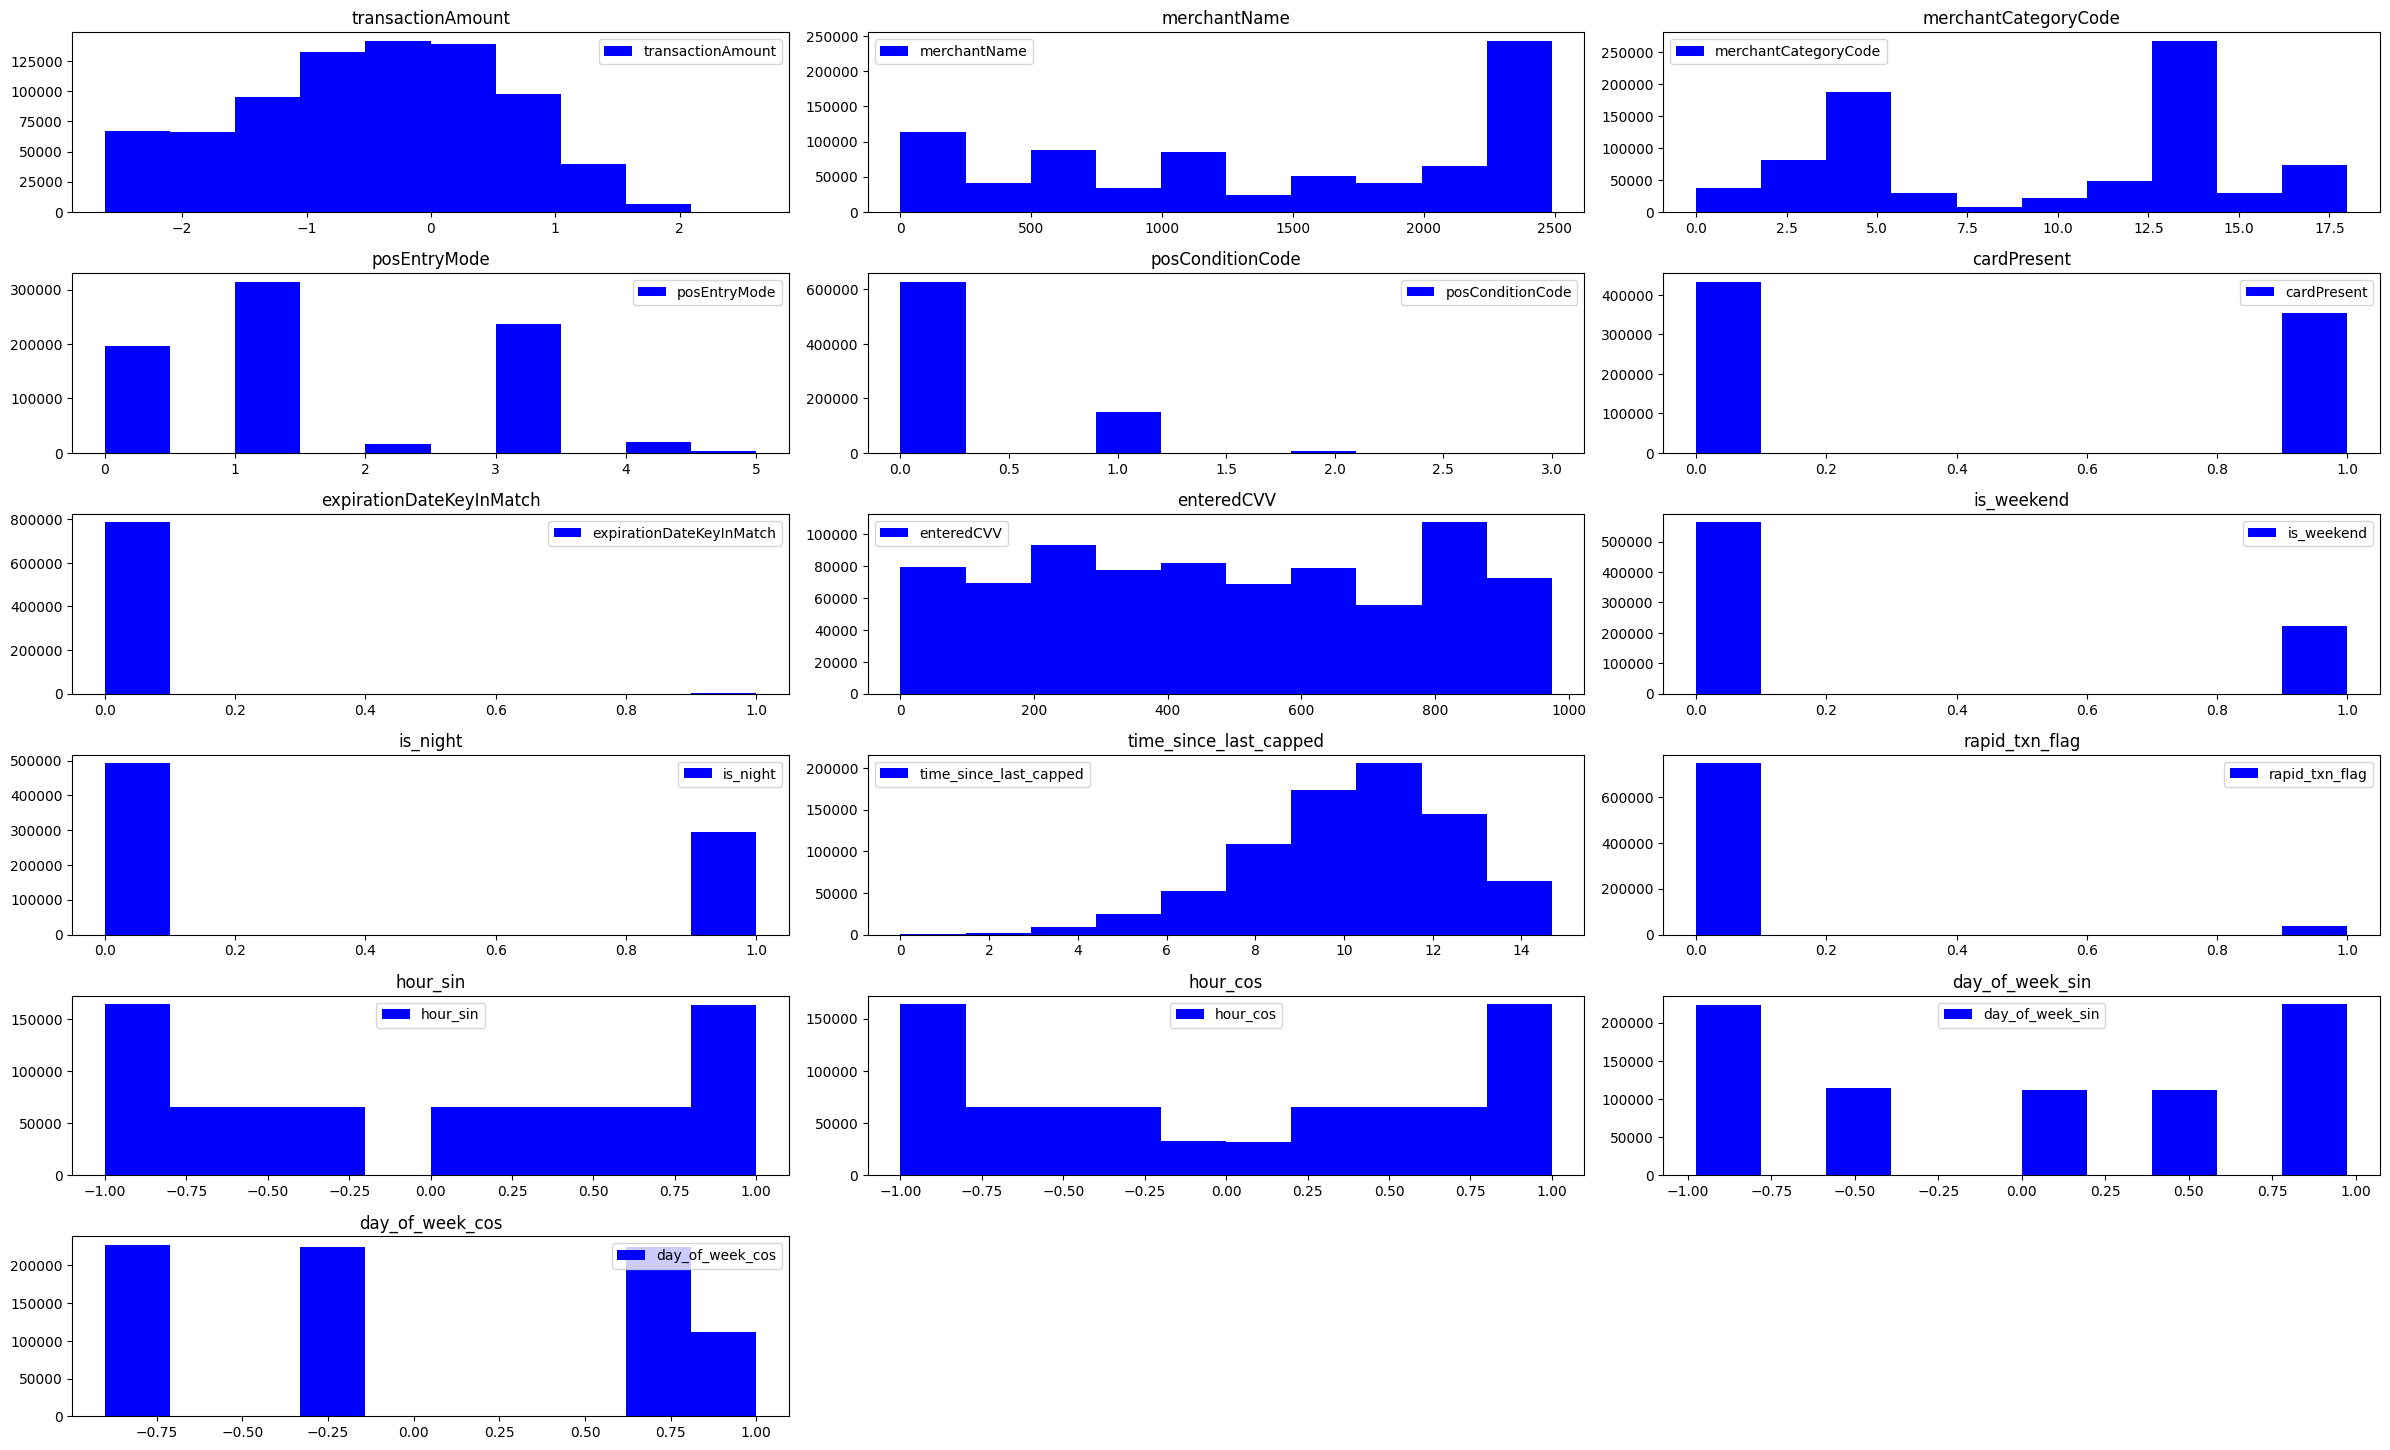

In [29]:
# Plot the distribution of all the features
plt.figure(figsize=(24,24))
try:
    for i, col in enumerate(X.columns.to_list()):
        plt.subplot(10, 3, i + 1)
        plt.hist(X[col], label=col,color='blue')
        plt.legend()
        plt.title(col)
        plt.tight_layout()
except Exception as e:
    print(col,e)

In [30]:
# Check for missing values in each column
missing_values = X.isnull().sum()
display(missing_values)

transactionAmount           0
merchantName                0
merchantCategoryCode        0
posEntryMode                0
posConditionCode            0
cardPresent                 0
expirationDateKeyInMatch    0
enteredCVV                  0
is_weekend                  0
is_night                    0
time_since_last_capped      0
rapid_txn_flag              0
hour_sin                    0
hour_cos                    0
day_of_week_sin             0
day_of_week_cos             0
dtype: int64

##### There are no missing values in the dataset. The dataset is ready for model training.

In [31]:
# Create new dataframe from the processed dataset
y = pd.Series(y, name='isFraud')
processed_data = pd.concat([X, y], axis =1)

display(processed_data)

,transactionAmount,merchantName,merchantCategoryCode,posEntryMode,posConditionCode,cardPresent,expirationDateKeyInMatch,enteredCVV,is_weekend,is_night,time_since_last_capped,rapid_txn_flag,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,isFraud
541900,0.379319,534,3,0,0,1,0,489,0,1,10.423412,0,0.000000,1.000000,0.781831,0.623490,0
541901,-0.949332,363,5,1,0,1,0,489,0,0,11.124170,0,-0.965926,0.258819,0.781831,0.623490,0
541902,0.969276,1130,13,1,0,0,0,332,1,0,12.941144,0,-0.707107,-0.707107,-0.781831,0.623490,0
541903,-0.654025,528,3,0,0,1,0,489,0,0,14.150362,0,-0.965926,0.258819,0.781831,0.623490,0
541904,0.030757,14,5,3,1,1,0,489,0,1,10.370267,0,0.866025,0.500000,0.974928,-0.222521,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108111,0.633558,589,5,3,0,1,0,45,0,0,14.592060,0,-0.707107,-0.707107,-0.433884,-0.900969,0
108112,-2.263609,1305,12,1,0,0,0,45,0,0,13.147226,0,-0.258819,-0.965926,0.433884,-0.900969,0
108113,-2.263609,1305,12,1,0,0,0,45,1,0,14.685197,0,-0.866025,-0.500000,-0.781831,0.623490,0
108114,-2.263609,1305,12,1,0,0,0,45,0,1,14.685197,0,0.000000,1.000000,0.433884,-0.900969,0


### 4. Save the processed features

In [32]:
# Export DataFrame to CSV
csv_file = '/Users/DS/Capital_One_Data_Science_Challenge/processed_data_for_training.csv'
processed_data.to_csv(csv_file, index=False)

print(f"DataFrame exported to {csv_file}")

DataFrame exported to /Users/DS/Capital_One_Data_Science_Challenge/processed_data_for_training.csv
